In [2]:
import torch as t
from torch import nn

In [8]:
class Linear(nn.Module):
    def __init__(self,in_features,out_features):
        super(Linear,self).__init__()
        self.w = nn.Parameter(t.randn(in_features,out_features))
        self.b = nn.Parameter(t.randn(out_features))
    def forward(self,x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)

In [9]:
layer = Linear(4,3) #4个神经元，3个输出
input = t.ones(2,4)
print(input)
output = layer(input)
print(output)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[-0.1824,  1.0436,  0.7666],
        [-0.1824,  1.0436,  0.7666]], grad_fn=<AddBackward0>)


In [10]:
for name, parameter in layer.named_parameters():
    print(name, parameter) # w and b

w Parameter containing:
tensor([[ 0.1193,  0.3439,  0.8558],
        [ 0.1748, -0.2536, -0.6908],
        [ 0.4967,  0.3254, -0.9458],
        [-1.2359, -0.2741,  0.2676]], requires_grad=True)
b Parameter containing:
tensor([0.2627, 0.9022, 1.2798], requires_grad=True)


In [11]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage

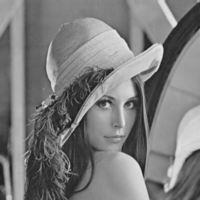

In [12]:
to_tensor = ToTensor()
to_pil = ToPILImage()
girl = Image.open('imgs/lena.png')
girl

torch.Size([1, 1, 200, 200])
tensor([[-0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250]])


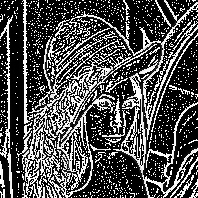

In [13]:
input = to_tensor(girl).unsqueeze(0)
print(input.size())
kernel = t.ones(3,3)/-8.
print(kernel)
kernel[1][1] = 1
conv = nn.Conv2d(1,1,(3,3),1,bias = False)
conv.weight.data = kernel.view(1,1,3,3)
out = conv(input)
to_pil(out.data.squeeze(0))

In [14]:
pool = nn.AvgPool2d(2,3)
list(pool.parameters())

[]

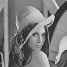

In [17]:
out = pool(input)
to_pil(out.data.squeeze(0))

In [18]:
input = t.randn(2,3)
linear = nn.Linear(3,4)
h = linear(input)
h

tensor([[-0.7733,  1.5394, -0.0435, -1.0129],
        [ 0.4919, -0.3614,  0.4022, -0.3335]], grad_fn=<AddmmBackward>)